In [1]:
import numpy as np

from astropy import table

%matplotlib inline
from matplotlib import rcParams, style
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


rcParams['legend.fontsize'] = rcParams['axes.labelsize'] = 20
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] =  rcParams['ytick.labelsize'] = 16

In [2]:
# the data file is generated in "UpID ever experiments" notebook
tabs = [table.Table.read('data_for_venn_diagram_sorted_smalltolarge.fits.gz', hdu=hdunum) for hdunum in range(1,25)]
tabs[0]

in_dr1,detectable_dr1,vel_cuts,sat_now,sat_ever
int64,int64,int64,int64,int64
0,0,0,0,0
0,0,1,0,0
0,0,0,0,0
1,1,0,1,1
0,0,0,0,0
0,0,0,0,0
0,0,0,1,1
0,0,0,1,1
0,0,0,1,1


In [3]:
base_color = (0, 0.5, 0)
notnow_color = '#FF0000'
never_color = '#F79400'

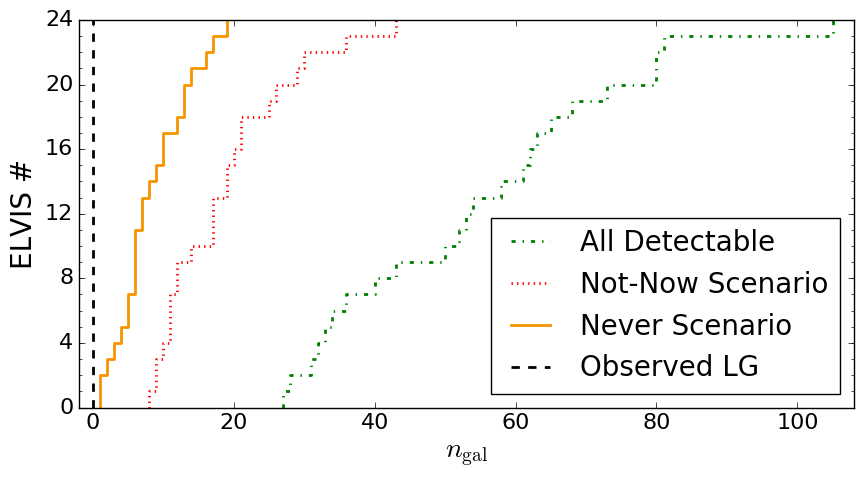

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

nosat = []
notnow = []
never = []

for t in tabs:
    nosatmsk = t['in_dr1'] & t['detectable_dr1'] & t['vel_cuts']
    nosat.append(np.sum(nosatmsk))
    notnow.append(np.sum(nosatmsk&~t['sat_now']))
    never.append(np.sum(nosatmsk&~t['sat_ever']))
    
def make_line(data, color, leg=None, ls='-'):
    ax.step(np.append(np.sort(data), np.max(data)), np.arange(len(data)+1), c=color, label=leg, linestyle=ls)

make_line(nosat, base_color, 'All Detectable', '-.')
make_line(notnow, notnow_color, 'Not-Now Scenario', ':')
make_line(never, never_color, 'Never Scenario')

ax.axvline(0, c='k', ls='--', label='Observed LG')

plt.xlim(-2, 108)
plt.ylim(0, 24)

major_y_locator = MultipleLocator(4)
minor_y_locator = MultipleLocator(1)
ax.yaxis.set_major_locator(major_y_locator)
ax.yaxis.set_minor_locator(minor_y_locator)

ax.legend(loc=0)
ax.set_xlabel(r'$n_{\rm gal}$')
ax.set_ylabel(r'ELVIS #')

plt.savefig('paper/countsummary.pdf')

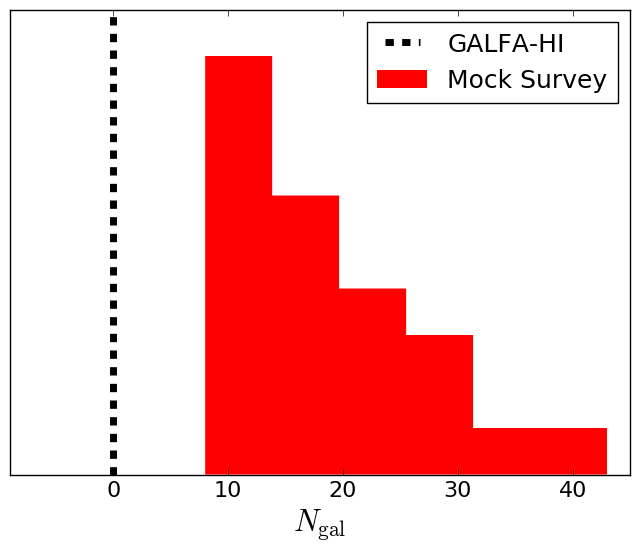

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

nosat = []
notnow = []
never = []

for t in tabs:
    nosatmsk = t['in_dr1'] & t['detectable_dr1'] & t['vel_cuts']
    nosat.append(np.sum(nosatmsk))
    notnow.append(np.sum(nosatmsk&~t['sat_now']))
    never.append(np.sum(nosatmsk&~t['sat_ever']))

plt.hist(notnow, histtype='stepfilled', color='r', bins=6, label='Mock Survey', lw=0)

plt.xlim(-9,np.max(notnow)+2)
plt.ylim(0, plt.ylim()[-1]+1)
plt.yticks([])

plt.axvline(0, ls='--', c='k', label='GALFA-HI', lw=5)

plt.legend(loc=0,fontsize=18)
plt.xlabel(r'$N_{\rm gal}$', fontsize=22)

plt.savefig('counts_simplified.pdf')

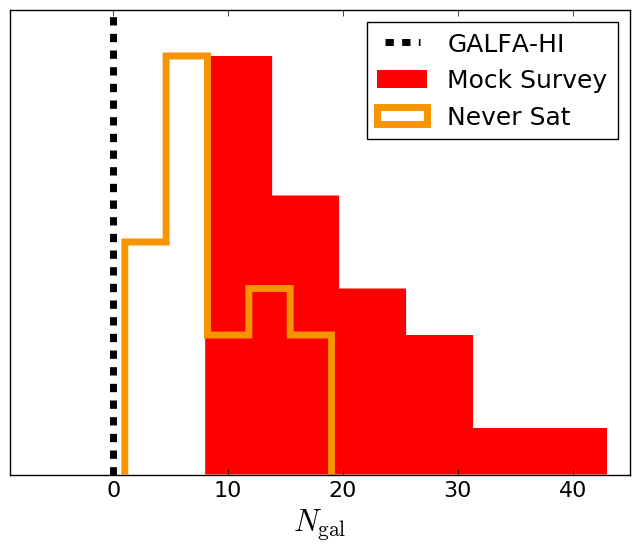

In [57]:
fig, ax = plt.subplots(figsize=(8,6))

nosat = []
notnow = []
never = []

for t in tabs:
    nosatmsk = t['in_dr1'] & t['detectable_dr1'] & t['vel_cuts']
    nosat.append(np.sum(nosatmsk))
    notnow.append(np.sum(nosatmsk&~t['sat_now']))
    never.append(np.sum(nosatmsk&~t['sat_ever']))

plt.hist(notnow, histtype='stepfilled', color='r', bins=6, label='Mock Survey', lw=0)
plt.hist(never, histtype='step', color=never_color, bins=5, label='Never Sat', lw=5, ls='-')
#plt.hist(notnow, histtype='step', color='r', bins=6, label='ELVIS, Sat Now')
#plt.hist(never, histtype='step', color=never_color, bins=5, label='ELVIS, Sat Never', ls=':', lw=3)

plt.xlim(-9,np.max(notnow)+2)
plt.ylim(0, plt.ylim()[-1]+1)
plt.yticks([])

plt.axvline(0, ls='--', c='k', label='GALFA-HI', lw=5)

plt.legend(loc=0,fontsize=18)
plt.xlabel(r'$N_{\rm gal}$', fontsize=22)

plt.savefig('counts_simplified2.pdf')